In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data source: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees?select=garments_worker_productivity.csv

from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [13]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['garments_worker_productivity.csv']))

#Tổng quan về dataset

In [4]:
df2.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [14]:
df2.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#=> chỉ có cột wip là thiếu dữ liệu

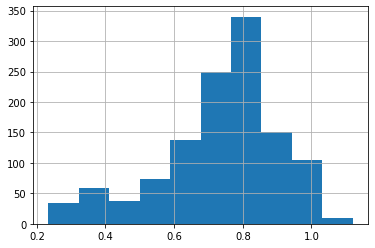

In [ ]:
df2.actual_productivity.hist(bins=10)

#Làm sạch dữ liệu

In [ ]:
#tìm outliers
x = df2.actual_productivity
mean = x.mean()
std = x.std()
zscore = (x-mean)/std

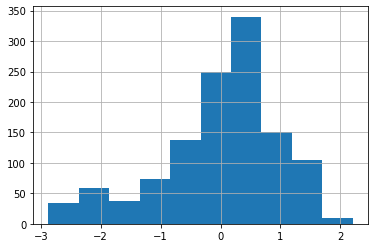

In [ ]:
zscore.hist(bins=10)

In [ ]:
#không có zscore vượt quá -3 và 3 nên không sử dụng zscore để loại bỏ outliers, sử dụng phương pháp IQR 

In [8]:
#calculate interquartile range 
q3, q1 = np.percentile(df2.actual_productivity, [75 ,25])
iqr = q3 - q1

#display interquartile range 
iqr

0.199945382

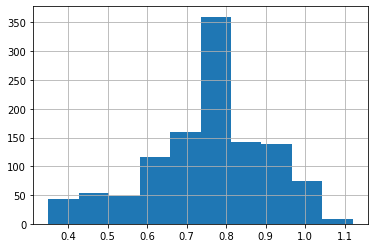

In [9]:
#loại bỏ outliers
min = q1 -1.5*iqr
max = q3 + 1.5*iqr
df_no_outliers = df2[~((df2.actual_productivity < min)|(df2.actual_productivity >max))]
df_outliers = df2[((df2.actual_productivity < min)|(df2.actual_productivity >max))]
df_no_outliers.actual_productivity.hist(bins=10)

In [22]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1143 non-null   object 
 1   quarter                1143 non-null   object 
 2   department             1143 non-null   object 
 3   day                    1143 non-null   object 
 4   team                   1143 non-null   int64  
 5   targeted_productivity  1143 non-null   float64
 6   smv                    1143 non-null   float64
 7   wip                    1143 non-null   float64
 8   over_time              1143 non-null   int64  
 9   incentive              1143 non-null   int64  
 10  idle_time              1143 non-null   float64
 11  idle_men               1143 non-null   int64  
 12  no_of_style_change     1143 non-null   int64  
 13  no_of_workers          1143 non-null   float64
 14  actual_productivity    1143 non-null   float64
dtypes: f

In [23]:
#xử lý dữ liệu trống
if df2.query("wip == 0") is True :
   print(num, "wip đâ có giá trị 0.")
print("Chọn NaN wip = 0.")

Chọn NaN wip = 0.


In [ ]:
#Vì wip là có thể nhận giá trị là số nguyên >=0

In [20]:
df_no_outliers.wip= df_no_outliers.wip.fillna(0)

In [21]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1143 non-null   object 
 1   quarter                1143 non-null   object 
 2   department             1143 non-null   object 
 3   day                    1143 non-null   object 
 4   team                   1143 non-null   int64  
 5   targeted_productivity  1143 non-null   float64
 6   smv                    1143 non-null   float64
 7   wip                    1143 non-null   float64
 8   over_time              1143 non-null   int64  
 9   incentive              1143 non-null   int64  
 10  idle_time              1143 non-null   float64
 11  idle_men               1143 non-null   int64  
 12  no_of_style_change     1143 non-null   int64  
 13  no_of_workers          1143 non-null   float64
 14  actual_productivity    1143 non-null   float64
dtypes: f

In [34]:
#chuyển dữ liệu categorical sang numberical, cột dữ liệu về ngày trong tuần
df_no_outliers['date_of_week'] = pd.to_datetime(df2['date']).dt.dayofweek
df_no_outliers.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_of_week
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,3
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,3
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,3
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,3
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,3


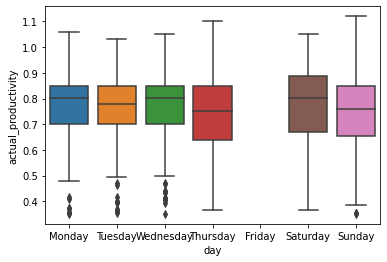

In [25]:
sns.boxplot(x='day', y='actual_productivity', data=df_no_outliers, order=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

In [ ]:
# => Không có giá trị thứ 6, có thể dự đoán ngày nghỉ của công ty là thứ 6

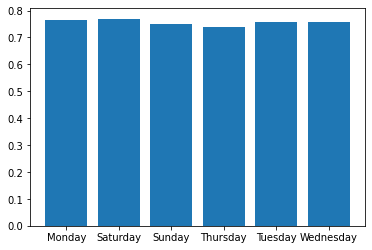

In [35]:
values_day = df_no_outliers.groupby('day').mean()['actual_productivity']
productivity_day = [day for day,value in values_day.items()]

plt.bar(productivity_day, values_day)
plt.show()

In [54]:
values_day

day
Monday       0.765656
Saturday     0.769727
Sunday       0.748700
Thursday     0.738329
Tuesday      0.756027
Wednesday    0.756881
Name: actual_productivity, dtype: float64

In [ ]:
# => thứ 7 (ngày làm việc sau ngày nghỉ hàng tuần) có năng suất trung bình cao nhất, thứ 5 (ngày làm việc trước ngày nghỉ hàng tuần) có năng suất trung bình thấp nhất

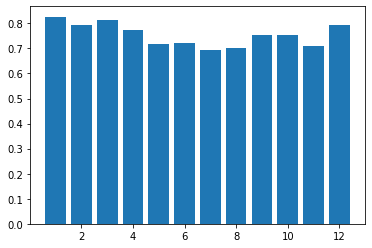

In [37]:
values_team = df_no_outliers.groupby('team').mean()['actual_productivity']
productivity_team = [team for team,value in values_team.items()]

plt.bar(productivity_team, values_team )
plt.show()

In [56]:
values_team

team
1     0.826370
2     0.793354
3     0.814643
4     0.774679
5     0.715763
6     0.722220
7     0.692370
8     0.699891
9     0.752718
10    0.752192
11    0.707872
12    0.793509
Name: actual_productivity, dtype: float64

In [ ]:
# => team 1 có năng suất trung bình cao nhất, team 7 có năng suất trung bình thấp nhất

In [41]:
corr = df_no_outliers.corr()
corr

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_of_week
team,1.000000,0.057192,-0.104867,-0.011166,-0.108192,-0.008172,0.003991,0.023632,-0.009424,-0.074463,-0.145151,-0.010647
targeted_productivity,0.057192,1.000000,-0.058257,0.025930,-0.053291,0.030240,-0.063265,-0.028525,-0.196166,-0.066306,0.381639,0.013431
smv,-0.104867,-0.058257,1.000000,0.318149,0.686719,0.037555,0.056977,0.104179,0.309071,0.913453,-0.166112,0.003972
wip,-0.011166,0.025930,0.318149,1.000000,0.277346,0.039587,-0.005464,-0.010291,0.046553,0.368091,0.039438,-0.100613
over_time,-0.108192,-0.053291,0.686719,0.277346,1.000000,-0.000871,0.032308,-0.016902,0.057527,0.738909,-0.084171,0.048323
incentive,-0.008172,0.030240,0.037555,0.039587,-0.000871,1.000000,-0.011996,-0.015471,-0.022737,0.054453,0.078350,-0.103588
idle_time,0.003991,-0.063265,0.056977,-0.005464,0.032308,-0.011996,1.000000,0.684541,-0.015524,0.057473,-0.098065,0.034231
idle_men,0.023632,-0.028525,0.104179,-0.010291,-0.016902,-0.015471,0.684541,1.000000,0.068829,0.099507,-0.135845,0.046239
no_of_style_change,-0.009424,-0.196166,0.309071,0.046553,0.057527,-0.022737,-0.015524,0.068829,1.000000,0.320978,-0.218006,-0.016293
no_of_workers,-0.074463,-0.066306,0.913453,0.368091,0.738909,0.054453,0.057473,0.099507,0.320978,1.000000,-0.101815,-0.006963


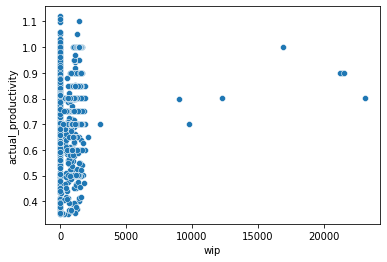

In [38]:
sns.scatterplot(x = df_no_outliers.wip, y = df_no_outliers.actual_productivity)

In [ ]:
#=> wip và năng suất có hệ số tương quan yếu

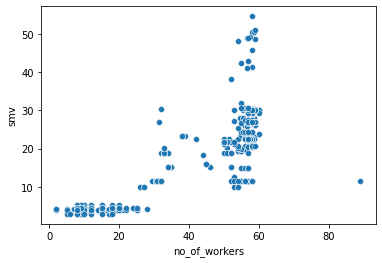

In [42]:
sns.scatterplot(x = df_no_outliers.no_of_workers, y = df_no_outliers.smv)

In [ ]:
#=> số công nhân và thời gian chuẩn có quan hệ đồng biến

#Kiểm định

In [45]:
#Kiểm định phân bố normal
from scipy.stats import shapiro
stat, p = shapiro(df_no_outliers.actual_productivity)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.967, p=0.000
Probably not Gaussian


In [46]:
stat, p = shapiro(df_no_outliers.targeted_productivity)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.717, p=0.000
Probably not Gaussian


In [ ]:
#=> Sử dụng kiểm định phi tham số

In [49]:
#Kiểm định về năng suất thực tế và năng suất tiêu chuẩn
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_no_outliers.actual_productivity, df_no_outliers.targeted_productivity)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=494999.500, p=0.000
Probably different distributions


In [ ]:
=> #giá trị năng suất thực tế và năng suất tiêu chuẩn không bằng nhau